# **How Can a Wellness Technology Company Play It Smart?**

## **Scenario**

I'm a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but it has the potential to become a larger player in the global smart device market.
Urka Sren, cofounder and chief creative officer of Bellabeat, believes that analysing smart device fitness data could help unlock new growth opportunities for the company. I have been asked to focus on one of Bellabeat’s products and analyse smart device data to gain insight into how consumers are using their smart devices.
The insights that I discover will then be helpful in guiding the marketing strategy for the company. Then I will present my analysis to the Bellabeat executive team along with my high-level recommendations for Bellabeat’s marketing strategy.





## **Ask**
In Ask phase I need to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. And then I need to apply these insights to their products.The questions are as follows:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

## **Prepare**
I was given a public dataset for analyzing and get insights of their daily activities and apply these insights to bellabeat products and influence Bellabeat market strategy.
FitBit Fitness Tracker Data is the public dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. 
The data consists details of 30 fitbit users and contains 18 .csv files. We will use **daily_activity** file as it a merge of  calories,intensity,steps. **weightLogInfo**, **hourlyIntensities** and **sleep data**.

### **Loading Packages**



In [1]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(readr)
library(tidyr)
library(dplyr)
library(skimr)
library(janitor)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




### **Importing Datasets**


In [2]:
activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
Activities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")

## **Process**
As we finished importing dataset, now we have to clean the data, as I have already checked the data in Excel.
Cleaning the data in R by using skim_without_charts(),head() 

In [3]:
head(activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [4]:
head(intensities)

,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


In [5]:
head(sleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


In [6]:
head(weight)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


There is no consistency in logging data as we can see in weight dataset there are only 8 people who have logged their data and also in daily activity there are many 0's we can take them as they didn't do anything on that day or they didn't logged/updated or didn't wear their fitbit.                             
Here, we can see that there is also time in date in weight,intensities and sleep data. We can convert/split the date and time by using as.POSIXct() function.

In [7]:
#intensity
intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")
intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y")

# weight
weight$Date=as.POSIXct(weight$Date, format="%m/%d/%Y", tz=Sys.timezone())
weight$date <- format(weight$Date, format = "%m/%d/%y")

#Activities
Activities$ActivityDay=as.POSIXct(Activities$ActivityDay, format="%m/%d/%Y", tz=Sys.timezone())
Activities$date <- format(Activities$ActivityDay, format = "%m/%d/%y")

# sleep
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")
sleep$time <- format(sleep$SleepDay,format = "%H:%M:%S")

# activity
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")

In [8]:
head(Activities)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,date
,<dbl>,<dttm>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1503960366,2016-04-12,728,328,13,25,0,6.06,0.55,1.88,04/12/16
2,1503960366,2016-04-13,776,217,19,21,0,4.71,0.69,1.57,04/13/16
3,1503960366,2016-04-14,1218,181,11,30,0,3.91,0.40,2.44,04/14/16
4,1503960366,2016-04-15,726,209,34,29,0,2.83,1.26,2.14,04/15/16
5,1503960366,2016-04-16,773,221,10,36,0,5.04,0.41,2.71,04/16/16
6,1503960366,2016-04-17,539,164,20,38,0,2.51,0.78,3.19,04/17/16


In [9]:
n_distinct(activity$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 24

[1] 8

By using n_distinct(), I found that there are 33 participants who have logged or updated their activities and intensities, and 24 for sleep data. 
Let's use summary() to see summary of these data

In [10]:
activity %>% 
  select(TotalSteps, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories) %>%
summary()

weight %>% 
  select(WeightKg,BMI) %>%
summary()

sleep %>% 
  select(TotalMinutesAsleep, TotalTimeInBed)%>%
summary()

   TotalSteps    VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :    0   Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.: 3790   1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median : 7406   Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 7638   Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.:10727   3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :36019   Max.   :210.00    Max.   :143.00      Max.   :518.0       
 SedentaryMinutes    Calories   
 Min.   :   0.0   Min.   :   0  
 1st Qu.: 729.8   1st Qu.:1828  
 Median :1057.5   Median :2134  
 Mean   : 991.2   Mean   :2304  
 3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :1440.0   Max.   :4900  

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.0  
 Median :433.0      Median :463.0  
 Mean   :419.5      Mean   :458.6  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

#### **Summary**
* Mean of TotalSteps is 7638. But we need to have a total of 10000 steps daily to be fit and to avoid any risks.
* We have a mean of 991.2 sedantary minutes.
* Mean of veryactiveminutes is 21.16 ,fairlyactiveminutes is 13.56 and lightlyactiveminutes is 192.8. This concludes that the participants are more likely to be lightly active.
* we have an averageBMI of 25.19 which is bad for health
* we can also observe that the participants are spending more time in bed rather than sleeping with the average difference of 39.1 minutes. And an average sleep of 7hrs


## **Analyse**


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



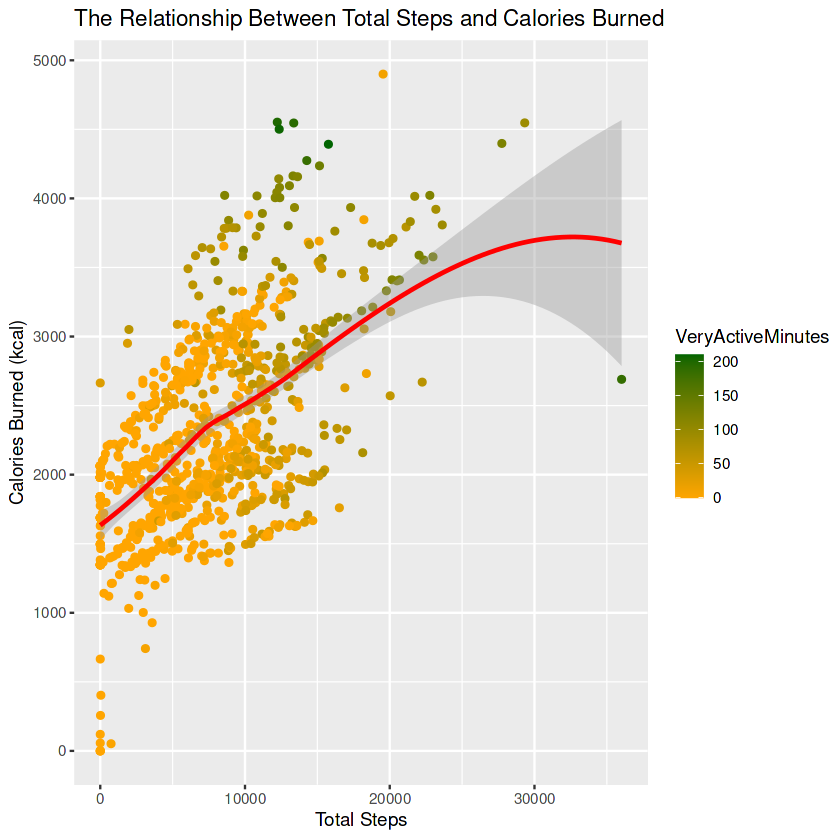

In [11]:
ggplot(data=activity) +
   geom_point(mapping=aes(x=TotalSteps, y=Calories, color=VeryActiveMinutes))+
  geom_smooth(mapping=aes(x=TotalSteps, y=Calories),color="red") +scale_color_gradient(low="orange", high="dark green")+
  labs(title="The Relationship Between Total Steps and Calories Burned", x="Total Steps", y="Calories Burned (kcal)")

Total steps and calories are corelated. More Steps covered more calories are burned.If there are more steps than that person is veryActive.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



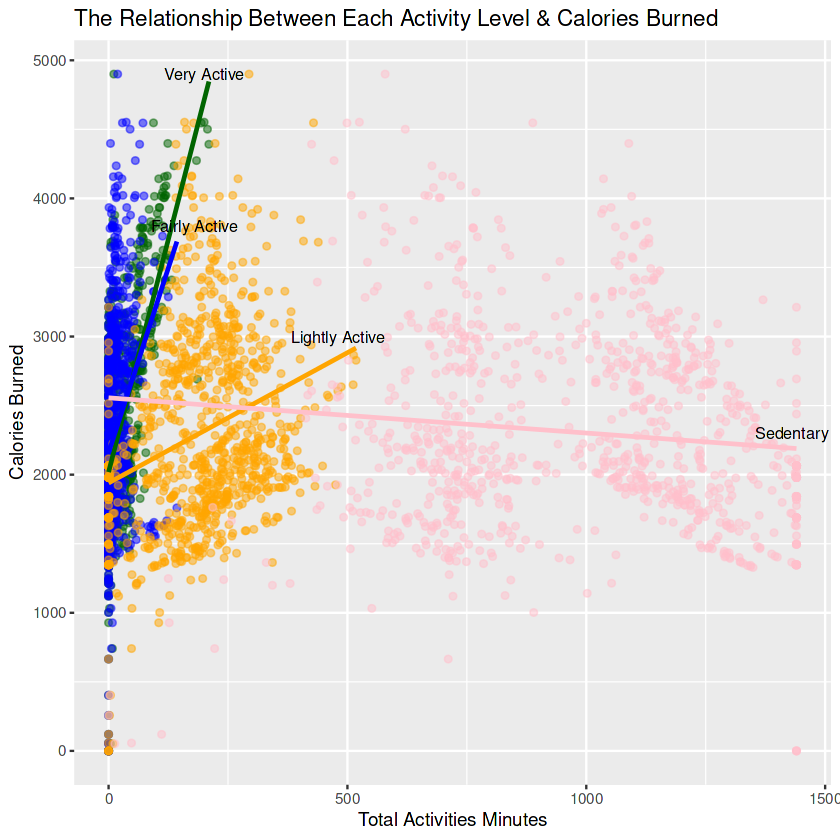

In [12]:
ggplot(data=activity) +
  geom_point(mapping=aes(x=VeryActiveMinutes, y=Calories,alpha=I(0.5)), color="darkgreen")+
  geom_point(mapping=aes(x=FairlyActiveMinutes, y=Calories,alpha=I(0.5)), color="blue")+
  geom_point(mapping=aes(x=LightlyActiveMinutes, y=Calories,alpha=I(0.5)), color="orange")+
  geom_point(mapping=aes(x=SedentaryMinutes, y=Calories,alpha=I(0.5)), color="pink")+
  geom_smooth(method=lm, mapping=aes(x=VeryActiveMinutes, y=Calories), color="darkgreen", se=F)+
  geom_smooth(method=lm, mapping=aes(x=FairlyActiveMinutes, y=Calories), color="blue", se=F)+
  geom_smooth(method=lm, mapping=aes(x=LightlyActiveMinutes, y=Calories), color="orange", se=F)+
  geom_smooth(method=lm, mapping=aes(x=SedentaryMinutes, y=Calories), color="pink", se=F)+
  labs(title="The Relationship Between Each Activity Level & Calories Burned", x="Total Activities Minutes", y="Calories Burned")+
  annotate("text", x=200, y=4900, label="Very Active", size=3.3, color="black")+
  annotate("text", x=180, y=3800, label="Fairly Active", size=3.3, color="black")+
  annotate("text", x=480, y=3000, label="Lightly Active", size=3.3, color="black")+
  annotate("text", x=1430, y=2300, label="Sedentary", size=3.3, color="black")

From the above visual we can observe that the more active people are then the more calories are being burned and also take less time to burn the calories.But most people are lightly active like myself.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



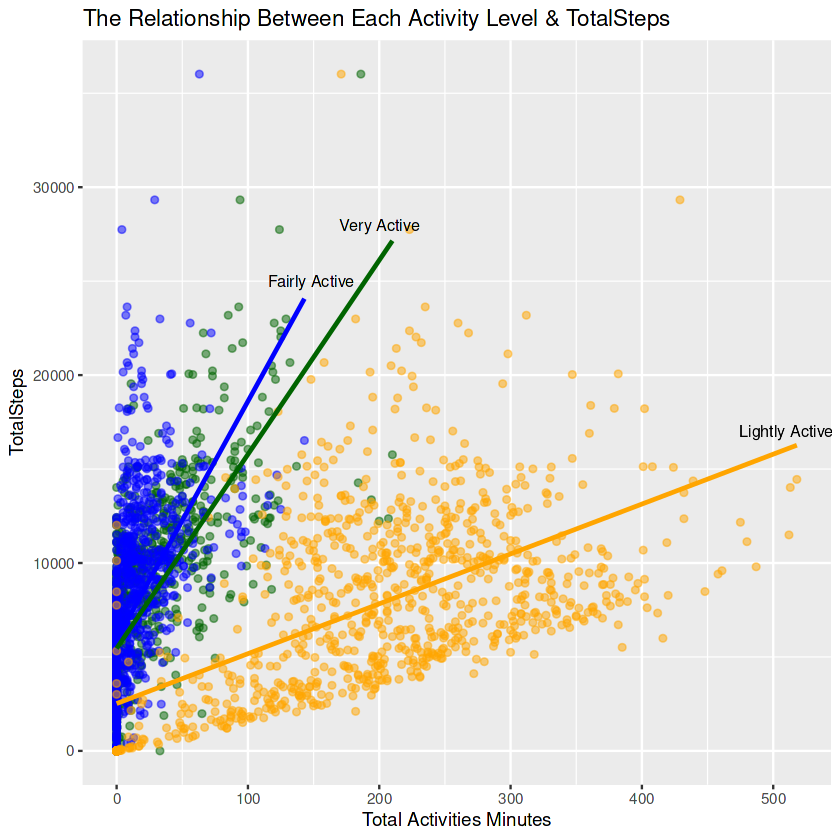

In [13]:
ggplot(data=activity) +
  geom_point(mapping=aes(x=VeryActiveMinutes, y=TotalSteps,alpha=I(0.5)), color="darkgreen")+
  geom_point(mapping=aes(x=FairlyActiveMinutes, y=TotalSteps,alpha=I(0.5)), color="blue")+
  geom_point(mapping=aes(x=LightlyActiveMinutes, y=TotalSteps,alpha=I(0.5)), color="orange")+
  geom_smooth(method=lm, mapping=aes(x=VeryActiveMinutes, y=TotalSteps), color="darkgreen", se=F)+
  geom_smooth(method=lm, mapping=aes(x=FairlyActiveMinutes, y=TotalSteps), color="blue", se=F)+
  geom_smooth(method=lm, mapping=aes(x=LightlyActiveMinutes, y=TotalSteps), color="orange", se=F)+
  labs(title="The Relationship Between Each Activity Level & TotalSteps", x="Total Activities Minutes", y="TotalSteps")+
  annotate("text", x=200, y=28000, label="Very Active", size=3.3, color="black")+
  annotate("text", x=148, y=25000, label="Fairly Active", size=3.3, color="black")+
  annotate("text", x=510, y=17000, label="Lightly Active", size=3.3, color="black")
  
  

As we can see, the steps taken by the very active are more than fairly and lightly active- these kind takes more steps and also time taken is longer than remaining.
This proves that Steps,calories are inversly proportional to time.

Now we see about the activity done during days of week.

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date,Day,ActiveMin
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<ord>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16,Tuesday,366
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16,Wednesday,257
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/16,Thursday,222
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/16,Friday,272
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/16,Saturday,267
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/16,Sunday,222


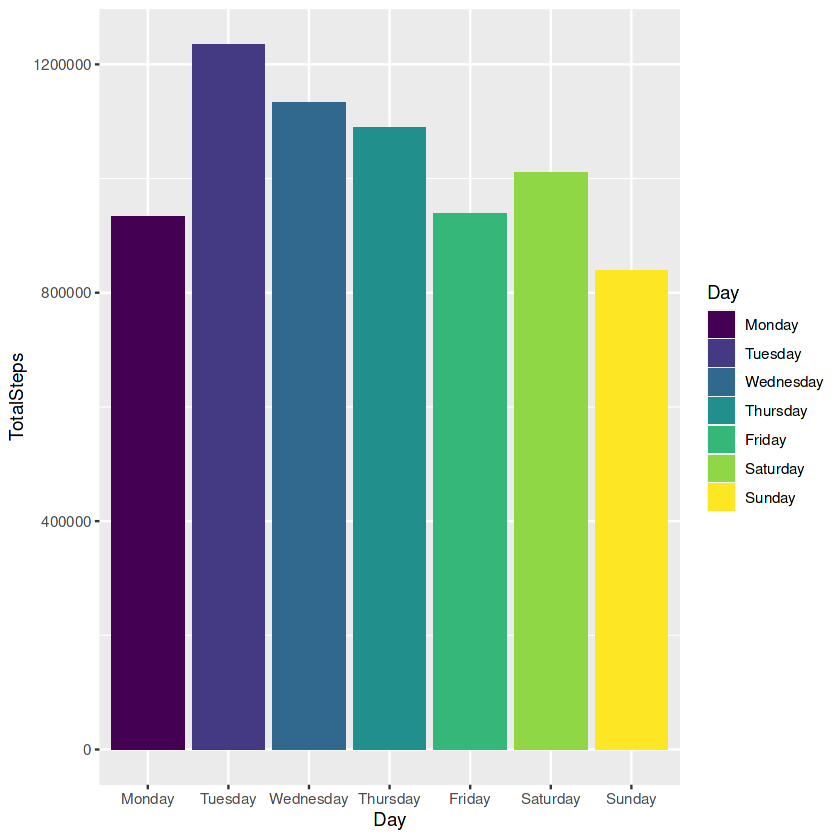

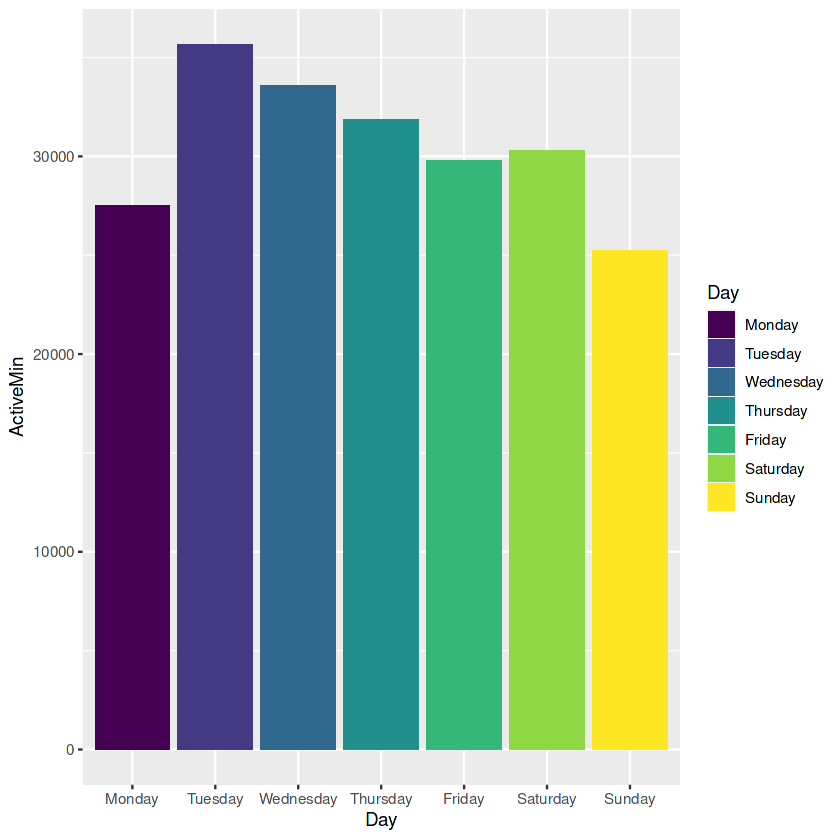

In [14]:
activity$Day <- weekdays(activity$ActivityDate) 
activity$Day <- ordered(activity$Day, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
"Friday", "Saturday", "Sunday"))
activity$WeekDay <- NULL
activity$ActiveMin <- rowSums(activity[,c("VeryActiveMinutes","FairlyActiveMinutes","LightlyActiveMinutes")])
head(activity)
ggplot(data=activity, aes(x=Day, y=TotalSteps, fill=Day))+
  geom_bar(stat="identity")
ggplot(data=activity,aes(x=Day,y=ActiveMin,fill=Day))+geom_bar(stat="identity")

TotalSteps done by the participants are high on Tuesday(Weekday),Saturday(Weekends). Activities are high on tuesday and Saturday as it is the weekend many people tend to go outside and do some shopping, party etc and Sunday is used for resting. 

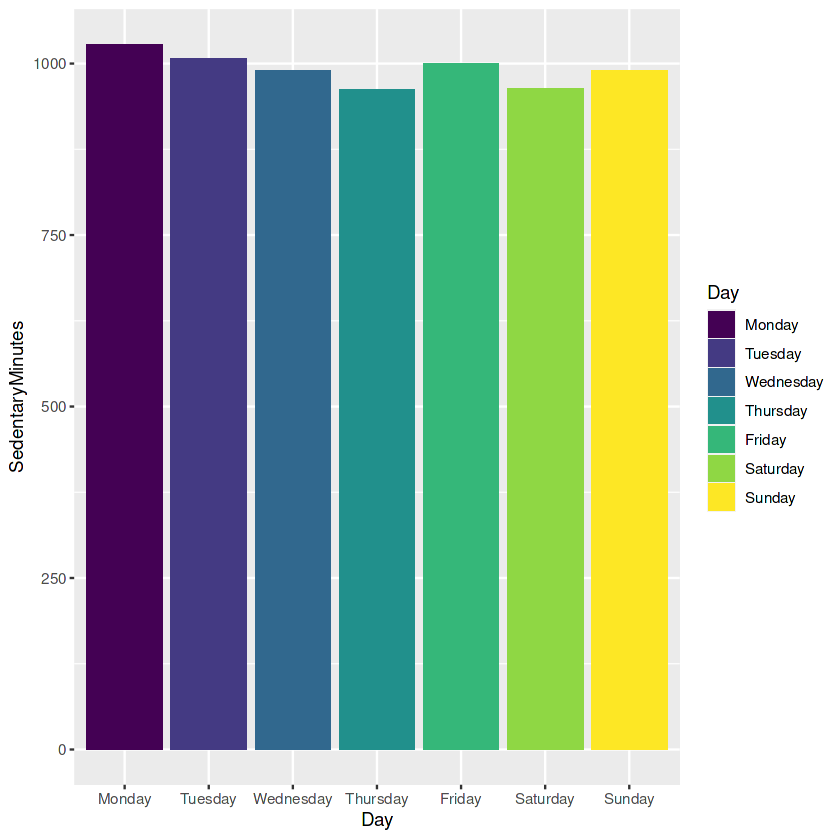

In [15]:
ggplot(data=activity, aes(x=Day, y=SedentaryMinutes, fill=Day))+
  geom_bar(stat="Summary",fun=mean)

Sedentary minutes are high on Monday.

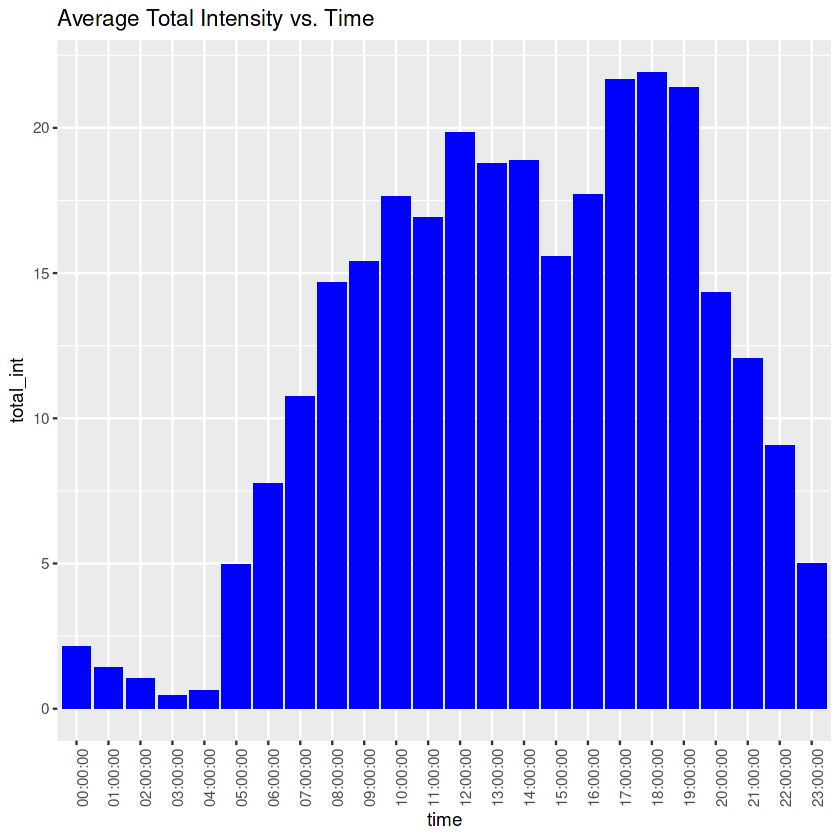

In [16]:
int_hour <- intensities %>%
group_by(time) %>%
drop_na() %>%
summarise(total_int = mean(TotalIntensity))

ggplot(data=int_hour,aes(x=time,y=total_int))+geom_bar(stat="identity",fill='blue')+theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")

From the above visual,Users are mostly active around 11a.m to 1pm and in the evening around 5-7p.m.

We are merging sleep and activity data to obtain more relations

In [17]:
joined_data <- merge(sleep, activity, by=c('Id', 'date'))
head(joined_data)

,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,time,ActivityDate,TotalSteps,TotalDistance,⋯,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day,ActiveMin
,<dbl>,<chr>,<dttm>,<int>,<int>,<int>,<chr>,<dttm>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<ord>,<dbl>
1,1503960366,04/12/16,2016-04-12,1,327,346,00:00:00,2016-04-12,13162,8.50,⋯,0.55,6.06,0,25,13,328,728,1985,Tuesday,366
2,1503960366,04/13/16,2016-04-13,2,384,407,00:00:00,2016-04-13,10735,6.97,⋯,0.69,4.71,0,21,19,217,776,1797,Wednesday,257
3,1503960366,04/15/16,2016-04-15,1,412,442,00:00:00,2016-04-15,9762,6.28,⋯,1.26,2.83,0,29,34,209,726,1745,Friday,272
4,1503960366,04/16/16,2016-04-16,2,340,367,00:00:00,2016-04-16,12669,8.16,⋯,0.41,5.04,0,36,10,221,773,1863,Saturday,267
5,1503960366,04/17/16,2016-04-17,1,700,712,00:00:00,2016-04-17,9705,6.48,⋯,0.78,2.51,0,38,20,164,539,1728,Sunday,222
6,1503960366,04/19/16,2016-04-19,1,304,320,00:00:00,2016-04-19,15506,9.88,⋯,1.32,5.03,0,50,31,264,775,2035,Tuesday,345


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



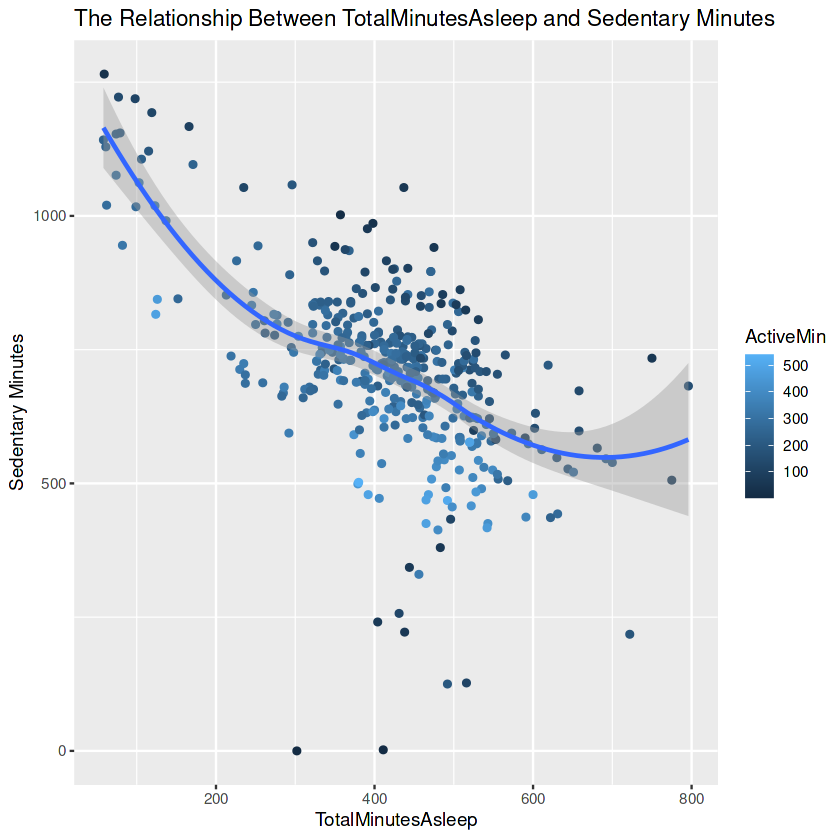

In [18]:
ggplot(data=joined_data,aes(x=TotalMinutesAsleep,y=SedentaryMinutes,color=ActiveMin)) +
geom_point()+geom_smooth()+
  labs(title="The Relationship Between TotalMinutesAsleep and Sedentary Minutes", x="TotalMinutesAsleep", y="Sedentary Minutes")



`geom_smooth()` using method = 'loess' and formula 'y ~ x'



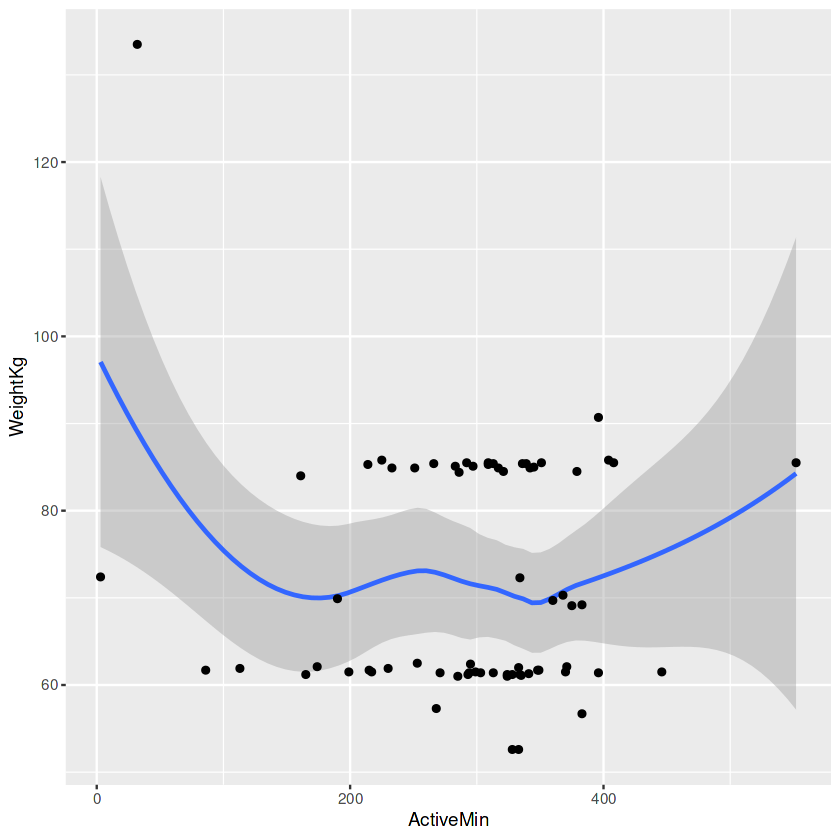

In [19]:
weight_merge <- merge(weight,activity,by=c('Id','date'))
ggplot(data=weight_merge,aes(x=ActiveMin,y=WeightKg))+geom_smooth()+geom_point()

## **Act**
### **Conclusion**
I have analysed the activities of the fitbit users and here are some key insights.
#### **Key Insights**
* Users are active from 8a.m where they start to go to their offices or do some excercise but the most users are active in lunch(11-2) and in the evening time (5-7).
* Users are more active on Tuesdays and Sundays than mondays as they are worst- we can see that **Sedentary Minutes** are high.
* Total steps taken on an avg are 7638.More calories are burned when they are more active but during sedentary also they are burning some calories.
* Users are mostly Lightly active.
* Users no matter about their weight there ActiveMin are same as the weight of users around 60 or below.So,these people are focusing on loosing weight.
* Users sleep around 5-7 hrs.

### **Recommendations**
As bellabeat is a femtech company so there audience is womens. And they have some products like Leaf,Time,Sleep,Spring,App,Membership.
* As users have more Sedentary minutes maybe they can use this time to make some light excercise which can be done anywhere. Women doing desk jobs should move their body and take some steps.
* They can provide some diet plan by taking their weight into consideration.
* Maybe they can include streaks to the challenges like snapchat streaks are important as some people like to maintain streaks.So, by using these streaks they can gift something to encourage their users. 
* Their app is also having yoga,excercises and all plans.They are doing great job.Maybe they don't need any recommendations.